In [6]:
!pip install -q oauth2client==1.5.2
from mooclib import *
import sys, inspect, urllib
sys.path.append("./utils/student_function/")
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html

CLICK ON THIS LINK TO AUTHENTICATE WITH YOUR GMAIL ACCOUNT
https://accounts.google.com/o/oauth2/auth?client_id=486275613361-7nk9ktukfcfjevfoe3tamjp0pmbjmprs.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080&scope=profile+email&access_type=offline&response_type=code
waiting for authentication ...
authentication succeeded


,sebastian.ruiz8@udea.edu.coSEBASTIAN RUIZ PALACIOgoogle id: 114687344014261575746authorization code: 4/bQGMFkuMD4EM2cvgyZ9OFqaKbum1OYWb1pIRICeF5qKg1Dln3W1pmd_5VRWlpTWhclKJyKcV0lerIu9t8u5h4J0


## Implementación de una Pila

Definimos el siguiente TAD, como una estructura de tipo LIFO (_Last In First Out_)

**TAD** $Stack$

$\forall S \in Stack, d \in AnyType$

**signatures**:
$$
\begin{align}
new() &\rightarrow Stack\\
S.put(d) &\rightarrow Stack \\
S.get() &\rightarrow AnyType\\
S.len() &\rightarrow \mathbb{Z}
\end{align}
$$    


**axioms**:

- $new().len() ::= 0 $
- $S.put(d).get() ::= d$
- $S.put(d).len() ::= S.len()+1$
- $S.get() \;\;and\;\; S.len()==0::=Error$
- $S.len()=n \;\;and\;\;S.get() \Rightarrow S.len()=n-1$

## Ejercicio 1

completa la función siguiente para añadir un elemento a una lista

ejecución de ejemplo:

    > x = [1,4,3]
    > print st.append(x,5)

    [1, 4, 3, 5]

In [2]:
%%writefile ./utils/student_function/PS01_01.py

def append(l,d):
    lista = l + [d]
    return lista

Overwriting ./utils/student_function/PS01_01.py


verifica manualmente tu código

In [11]:
import PS01_01 as st        
from importlib import reload; reload(st)

x = [1,4,3]
st.append(x,5)

[1, 4, 3, 5]

#### comprueba tu código con el corrector automático

In [12]:
!./run CHECK_SOLUTION PS01_01

checking your code with 100 random calls
** CORRECTO **
evaluation result 5.0


#### registra tu solución en línea

In [38]:
!./run SUBMIT_SOLUTION PS01_01

connecting ... registering submission for sebastian.ruiz8@udea.edu.co ...
no config found for section PS01, allowing all submissions
your submissions sheet is https://docs.google.com/spreadsheets/d/1WaK6Gr9sKYog5B6r3UnFKCNRUOte1AwPbjkDQg5r3kI
checking your code with 100 random calls
** CORRECTO **
----
evaluation result 5.0 , submission registered


## Ejercicio 2

completa la función siguiente para que, dada una lista, devuelva dos resultados:

- el valor del último elemento de la lista
- una nueva lista en la que se eliminó el último elemento
- si la lista es vacía debe de generar un `AssertionError`

Ejemplo de ejecución:

    > x = [1,5,6]
    > print "initial", x
    > for _ in range(len(x)+1):
    >     v,x = getremove_last(x)
    >     print "last val", v, ", remaining list", x
    
    initial [1, 5, 6]
    last val 6 , remaining list [1, 5]
    last val 5 , remaining list [1]
    last val 1 , remaining list []
    
    ----------------------------------------------------------------------
    AssertionError                       Traceback (most recent call last)
    <ipython-input-4-578f9f1609fe> in <module>()

In [3]:
%%writefile ./utils/student_function/PS01_02.py
def getremove_last(l):
    assert len(l) > 0, "AssertionError"
    longitud = len(l)
    val = l[longitud -1]
    rest_list = l[:-1]
    return val, rest_list

Overwriting ./utils/student_function/PS01_02.py


comprueba manualmente tu código

In [14]:
import PS01_02 as st  
from importlib import reload; reload(st)

x = [1,5,6]
print ("initial", x)
for _ in range(len(x)+1):
    v,x = st.getremove_last(x)
    print ("last val", v, ", remaining list", x)

initial [1, 5, 6]
last val 6 , remaining list [1, 5]
last val 5 , remaining list [1]
last val 1 , remaining list []


AssertionError: AssertionError

#### comprueba tu código con el corrector automático

In [15]:
!./run CHECK_SOLUTION PS01_02

checking your code with 100 random calls
** CORRECTO **
evaluation result 5.0


#### registra tu solución en línea

In [ ]:
!./run SUBMIT_SOLUTION PS01_02

##  Ejercicio 3

Completa la clase `Stack` con la semántica del TAD definido anteriormente. Usa las funciones anteriores si lo consideras necesario. Ejemplo de ejecución:

    > print "stacking elements"
    > s = st.Stack()
    > s.put(4).put(2).put("hola")
    > print s.len()
    > print s.elements
    > 
    > print ("\n--\nunstacking")
    > for _ in range(s.len()):
    >     print s.get()
    > 
    > print "this next call must fail"
    > s.get()

    stacking elements
    3
    [4, 2, 'hola']

    --
    unstacking
    hola
    2
    4
    this next call must fail

    AssertionErrorTraceback (most recent call last)
    <ipython-input-13-749203dd226f> in <module>()
         13 
         14 print "this next call must fail"
    ---> 15 s.get()
        ...

In [4]:
%%writefile ./utils/student_function/PS01_03.py


def append(l,d):
    l += [d]
    return l

def getremove_last(l):
    assert len(l) > 0, "AssertionError"
    longitud = len(l)
    val = l[longitud -1]
    rest_list = l[:-1]
    return val, rest_list  

class Stack:
    
    def __init__(self):
        self.elements = []
  
    def put(self, d):
        self.elements.append(d)
        return self
        
    def get(self):
        assert len(self.elements) > 0, "No hay nada en la pila"
        return self.elements.pop()

    def len(self):
        return len(self.elements)



Overwriting ./utils/student_function/PS01_03.py


In [17]:
import PS01_03 as st  
from importlib import reload; reload(st)
 
print ("stacking elements")
s = st.Stack()
s.put(4).put(2).put("hola")
print (s.len())
print (s.elements)

print ("\n--\nunstacking")
for _ in range(s.len()):
    print (s.get())
    
try:
    s.get()
    print ("*** cuidado! tu código no contiene asserts")
except AssertionError:
    print ("*** tu codigo está generando asserts correctos")

stacking elements
3
[4, 2, 'hola']

--
unstacking
hola
2
4
*** tu codigo está generando asserts correctos


#### comprueba tu código con el corrector automático


In [18]:
!./run CHECK_SOLUTION PS01_03

checking your code with 100 random parameters
** CORRECTO **
evaluation result 5.0


#### registra tu solución en línea

In [ ]:
!./run SUBMIT_SOLUTION PS01_03

## Implementación de una Cola

Definimos el siguiente TAD, como una estructura de tipo FIFO (_First In First Out_)

**TAD** $Queue$

$\forall Q \in Queue, d \in AnyType$

**signatures**:
$$
\begin{align}
new() &\rightarrow Queue\\
Q.put(d) &\rightarrow Queue \\
Q.get() &\rightarrow AnyType\\
Q.len() &\rightarrow \mathbb{Z}
\end{align}
$$    


**axioms**:

- $new().len() ::= 0 $

- $Q.get()^n==d_i \iff Q=new().put(d_i)^n$
- $Q.get(d).len() ::= Q.len()+1$
- $Q.get() \;\;and\;\; Q.len()==0::=Error$
- $Q.len()=n \;\;and\;\;Q.get() \Rightarrow Q.len()=n-1$

y definimos la notación:

- $Q.put(d_i)^n ::= Q.put(d_1).put(d_2)....put(d_n)$
- $Q.get()^n ::= Q.get()\;,\;... n\; veces\; ...\;,\; Q.get()$ y tomando el resultado del último



##  Ejercicio 4

Completa la clase `Queue` con la semántica que acabamos de definir. Ejemplo de ejecución

    > import PS01_04 as st  
    > reload(st)
    > 
    > print "enqueueing elements"
    > q = st.Queue()
    > q.put(4).put(2).put("hola")
    > print q.len()
    > print q.elements
    >
    > print ("\n--\ndequeueing")
    > for _ in range(q.len()):
    >     print q.get()
    >
    < print "this next call must fail"
    > q.get()


    enqueueing elements
    3
    [4, 2, 'hola']

    --
    dequeueing
    4
    2
    hola
    this next call must fail

    AssertionErrorTraceback (most recent call last)
    <ipython-input-284-50dc775a67ed> in <module>()
         13 
         14 print "this next call must fail"
    ---> 15 q.get()

In [5]:
%%writefile ./utils/student_function/PS01_04.py


def append(l,d):
    l += [d]
    return l


class Queue:
    
    def __init__(self):
        self.elements = []
        
    def put(self, d):
        self.elements.append(d)
        return self
    
    def get(self):
        assert len(self.elements) > 0, "cola vacía"
        val = self.elements[0]
        self.elements = self.elements[1:]
        return val
    
    def len(self):
        return len(self.elements)

Overwriting ./utils/student_function/PS01_04.py


In [20]:
import PS01_04 as st  
from importlib import reload; reload(st)

print ("enqueueing elements")
q = st.Queue()
q.put(4).put(2).put("hola")
print (q.len())
print (q.elements)

print ("\n--\ndequeueing")
for _ in range(q.len()):
    print (q.get())

print ("this next call must fail")
q.get()

enqueueing elements
3
[4, 2, 'hola']

--
dequeueing
4
2
hola
this next call must fail


AssertionError: cola vacía

#### comprueba tu código con el corrector automático


In [21]:
!./run CHECK_SOLUTION PS01_04

checking your code with 100 random parameters
** CORRECTO **
evaluation result 5.0


#### registra tu solución en línea

In [ ]:
!./run SUBMIT_SOLUTION PS01_04

## Medición de rendimientos y complejidades algorítmicas

## Ejercicio 5

completa la función siguiente que debe de llenar una cola o una pila `t`, pasada como argumento, con `n` números **enteros** aleatorios con valores entre 0 y 9, ambos incluidos. Usa [np.random.randint](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)

In [6]:
%%writefile ./utils/student_function/PS01_05.py
import numpy as np
def fill(t, n):
    numeros = np.random.randint(10,size=n)
    for i in numeros: 
        t.put(i)
    return t

Overwriting ./utils/student_function/PS01_05.py


comprueba manualmente tu código, cada ejecución ha de generar valores distintos

In [38]:
import PS01_05 as st5
import PS01_04 as st4
from importlib import reload
reload(st4);reload(st5)

q = st5.fill(st4.Queue(), 100)
print ("len=",q.len())
for _ in range(q.len()):
    print (q.get(), end=" ")

len= 100
4 9 4 4 7 5 3 3 0 1 4 0 2 1 9 6 4 2 2 2 8 7 0 3 9 1 3 8 3 0 8 0 2 2 2 0 8 2 7 9 7 5 8 2 1 7 8 5 2 7 5 3 8 9 0 3 8 0 1 1 7 9 3 5 1 8 0 0 6 8 7 6 1 7 6 0 3 8 4 9 0 5 1 8 5 6 1 4 8 1 8 6 3 5 8 2 1 8 5 2 

#### comprueba tu código con el corrector automático


In [39]:
!./run CHECK_SOLUTION PS01_05

checking your code with 100 random parameters
** CORRECTO **
evaluation result 5.0


#### registra tu solución en línea

In [40]:
!./run SUBMIT_SOLUTION PS01_05

connecting ... registering submission for sebastian.ruiz8@udea.edu.co ...
no config found for section PS01, allowing all submissions
your submissions sheet is https://docs.google.com/spreadsheets/d/1WaK6Gr9sKYog5B6r3UnFKCNRUOte1AwPbjkDQg5r3kI
checking your code with 100 random parameters
** CORRECTO **
----
evaluation result 5.0 , submission registered


## Ejercicio 6
completa la función siguiente que debe de vaciar una cola o pila `t` y devolver el conjunto de datos obtenido tras vaciarla.

In [9]:
%%writefile ./utils/student_function/PS01_06.py
import numpy as np
def empty(t):
    a = []
    for i in range(t.len()):
        a.append(t.get())
    return a

Overwriting ./utils/student_function/PS01_06.py


In [89]:
import PS01_06 as st6
import PS01_04 as st4
from importlib import reload
reload(st4); reload(st6)
a = [1,4,1,10,2,3]
q = st4.Queue()
for i in a:
    q.put(i)
k = st6.empty(q)
k,q.elements

([1, 4, 1, 10, 2, 3], [])

#### comprueba tu código con el corrector automático


In [90]:
!./run CHECK_SOLUTION PS01_06

checking your code with 100 random parameters
** CORRECTO **
evaluation result 5.0


#### registra tu solución en línea

In [91]:
!./run SUBMIT_SOLUTION PS01_06

connecting ... registering submission for sebastian.ruiz8@udea.edu.co ...
no config found for section PS01, allowing all submissions
your submissions sheet is https://docs.google.com/spreadsheets/d/1WaK6Gr9sKYog5B6r3UnFKCNRUOte1AwPbjkDQg5r3kI
checking your code with 100 random parameters
** CORRECTO **
----
evaluation result 5.0 , submission registered


## Experimento

**ya acabaste el taller**, fíjate ahora como hacemos un experimento con pilas y colas de varios tamaños y comparamos los tiempos de ejecución. Comparamos también con las implementaciones que ya vienen en las librerías estándar de Python: [Queue LifoQueue](https://docs.python.org/2/library/queue.html). Observa que `queue.Queue` es funcionalmente equivalente a nuestro `Queue` y `queue.LifoQueue` es equivalente a nuestro `Stack`.

Hazte las siguientes preguntas:

- ¿Qué implementaciones son más lentas y más rápidas? ¿Por qué?
- ¿Qué complejidades tenemos en inserción y recuperación? $\mathcal{O}(n)$, $\mathcal{O}(\log n)$, $\mathcal{O}(c)$ ?

Observa que las métricas de tiempo tienen dos componentes:

- El debido a la complejidad intrínseca del algoritmo
- El debido a la implementación del mismo

In [10]:
import matplotlib.pyplot as plt
import PS01_06 as st6        
import PS01_05 as st5 
import PS01_04 as st4 
import PS01_03 as st3 
%matplotlib inline
def compare(class_1, class_2, n_powers=5):
    global n, class_A, class_B, q
    class_A = class_1
    class_B = class_2
    t1, t2, t3, t4 = [], [], [], []

    ns = [int(10**i) for i in range(n_powers)]
    
    for n in ns:
        print (n,end=" ")
        k = %timeit -o -q st5.fill(class_A(), n)
        t1.append(k.best*1000)

        k = %timeit -o -q st5.fill(class_B(), n)
        t2.append(k.best*1000)
        
        q = st5.fill(class_A(), n)
        k = %timeit -o -r 1 -n 1 -q st6.empty(q)
        t3.append(k.best*1000)

        q = st5.fill(class_B(), n)
        k = %timeit -o -r 1 -n 1 -q st6.empty(q)
        t4.append(k.best*1000)
                
    plt.figure(figsize=(10,3))
    
    plt.subplot(121)
    plt.plot(t1, label=class_A.__name__+" fill")
    plt.plot(t2, label=class_B.__name__+" fill")
    plt.xticks(range(len(ns)), ns)
    plt.xlabel("number of elements")
    plt.ylabel("time (ms)")
    plt.legend()
    
    plt.subplot(122)
    plt.plot(t3, label=class_A.__name__+" empty")
    plt.plot(t4, label=class_B.__name__+" empty")
    plt.xticks(range(len(ns)), ns)
    plt.xlabel("number of elements")
    plt.legend()


ModuleNotFoundError: No module named 'PS01_06'

1 10 100 1000 10000 

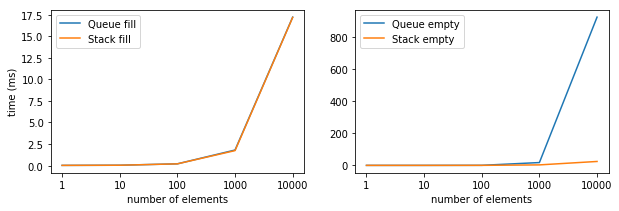

In [94]:
compare(st4.Queue, st3.Stack);

1 10 100 1000 10000 

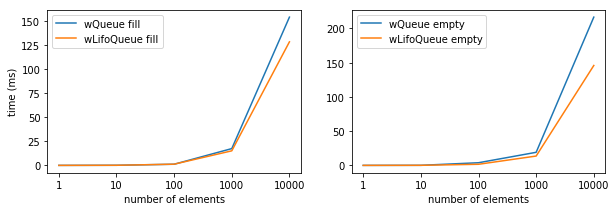

In [95]:
import queue

class wQueue(queue.Queue):
    def len(self):
        return self.qsize()

class wLifoQueue(queue.LifoQueue):
    def len(self):
        return self.qsize()

    
compare(wQueue, wLifoQueue)